In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv('../airplane_df.csv')

/var/folders/ws/w4d9z41n7vj1pg3kqv95frm80000gn/T/ipykernel_17694/1859478540.py:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../airplane_df.csv')


## Filter to only US accidents 

In [13]:
df = df.set_index('Event.Id')

us_accidents = df[df['Country'] == 'United States']

## Group injuries by state 

In [14]:
injuries_by_state = us_accidents.groupby('State').sum(numeric_only = True).loc[:, 'Total.Fatal.Injuries':]
injuries_by_state['Total.People'] = injuries_by_state.sum(axis=1)

In [15]:
injuries_by_state

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People
State,,,,,
AK,309.0,437.0,255.0,3243.0,4244.0
AL,112.0,68.0,58.0,386.0,624.0
AR,96.0,79.0,64.0,352.0,591.0
ATL,15.0,0.0,2.0,274.0,291.0
AZ,251.0,128.0,125.0,1900.0,2404.0
...,...,...,...,...,...
WA,170.0,161.0,128.0,2223.0,2682.0
WI,135.0,118.0,92.0,764.0,1109.0
WN,2.0,0.0,0.0,1.0,3.0


## Quick visualization of injury distribution by state 
Here we can see how in every state, the majority of people were uninjured after an airplane incident.

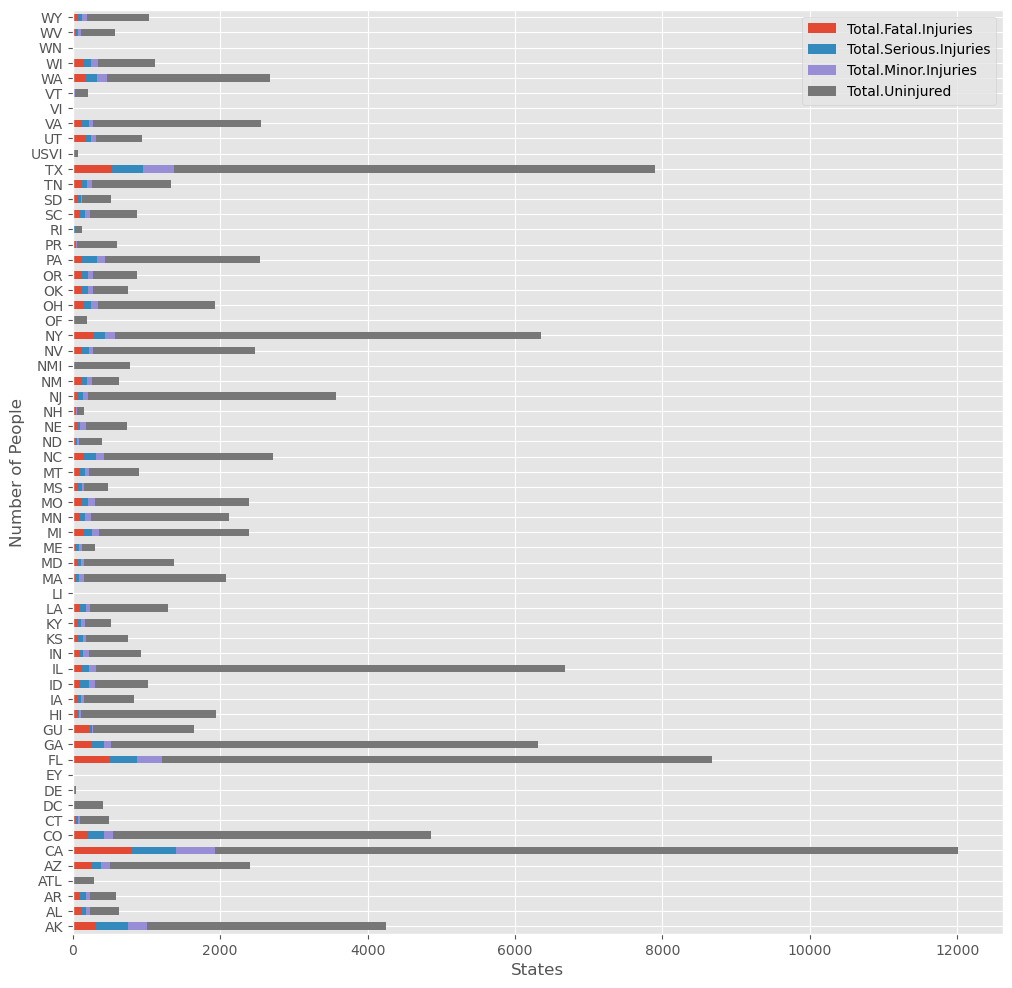

In [16]:
plt.style.use('ggplot')
injuries_by_state[injuries_by_state.columns[:4]].plot(kind='barh', stacked=True, figsize=(12, 12),
                                                     ylabel='Number of People', xlabel = 'States');

# Fatality percentage
A column has been added for the fatality percentage by state. This was obtained by dividing the number of total fatal injuries by the total number of people involved in the accidents.

In [17]:
injuries_by_state['Fatality.Perc'] = (injuries_by_state['Total.Fatal.Injuries'] / injuries_by_state['Total.People']) * 100
injuries_by_state.sort_values(by='Fatality.Perc', ascending=False)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People,Fatality.Perc
State,,,,,,
VI,1.0,0.0,0.0,0.0,1.0,100.000000
EY,2.0,0.0,0.0,0.0,2.0,100.000000
WN,2.0,0.0,0.0,1.0,3.0,66.666667
NM,131.0,68.0,62.0,368.0,629.0,20.826709
DE,9.0,4.0,6.0,28.0,47.0,19.148936
...,...,...,...,...,...,...
IL,116.0,103.0,100.0,6366.0,6685.0,1.735228
OF,3.0,0.0,3.0,182.0,188.0,1.595745
NMI,1.0,7.0,9.0,762.0,779.0,0.128370


## Total Accidents
Here we have added a column for the total accidents per state.

In [18]:
accidents_per_state = us_accidents.groupby('State').count()['Accident.Number'].rename('Total.Accidents')
injuries_by_state = injuries_by_state.merge(accidents_per_state, on='State', how='left')
injuries_by_state

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People,Fatality.Perc,Total.Accidents
State,,,,,,,
AK,309.0,437.0,255.0,3243.0,4244.0,7.280867,1554
AL,112.0,68.0,58.0,386.0,624.0,17.948718,334
AR,96.0,79.0,64.0,352.0,591.0,16.243655,376
ATL,15.0,0.0,2.0,274.0,291.0,5.154639,12
AZ,251.0,128.0,125.0,1900.0,2404.0,10.440932,853
...,...,...,...,...,...,...,...
WA,170.0,161.0,128.0,2223.0,2682.0,6.338553,693
WI,135.0,118.0,92.0,764.0,1109.0,12.173129,438
WN,2.0,0.0,0.0,1.0,3.0,66.666667,4


## Average Plane Capacity
Here we can see the average plane capacity determined by dividing the total number of people by the total number of accidents.

The table below has been adjusted, so we can only see the states with number of accidents in the 25th percentile. Anything lower than that can provide deceptive information. For example, a place that has only had one very serious accident would show a disproportionately high fatality percentage.

In [20]:
injuries_by_state['Avg.Plane.Capacity'] = injuries_by_state['Total.People'] / injuries_by_state['Total.Accidents']

In [21]:
injuries_by_state[['Total.People', 'Fatality.Perc', 'Total.Accidents', 'Avg.Plane.Capacity']].sort_values(by=['Total.Accidents'], ascending=False). \
loc[(injuries_by_state['Total.Accidents'] >= injuries_by_state['Total.Accidents'].quantile(0.25))]

,Total.People,Fatality.Perc,Total.Accidents,Avg.Plane.Capacity
State,,,,
CA,12018.0,6.556831,2192,5.482664
TX,7895.0,6.789107,1807,4.369120
FL,8668.0,5.722197,1651,5.250151
AK,4244.0,7.280867,1554,2.731017
AZ,2404.0,10.440932,853,2.818288
CO,4857.0,4.385423,726,6.690083
WA,2682.0,6.338553,693,3.870130
GA,6310.0,4.057052,674,9.362018
NC,2710.0,5.719557,545,4.972477


## Fatality percentage vs average plane capacity
We can observe that there's a clear exponential decay in fatalities as the plane capacity increases.

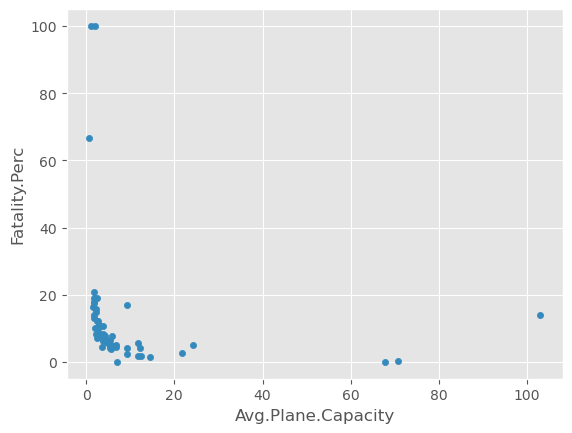

In [24]:
injuries_by_state.plot(kind='scatter', y='Fatality.Perc', x='Avg.Plane.Capacity');

In [ ]:
#Export to CSV. DO NOT RUN this cell unless an export of this csv file is needed.

injuries_by_state.to_csv('injuries_by_state.csv', encoding='UTF-8')